<a href="https://colab.research.google.com/github/Ryaaha/Clipboard-Tracker/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing the yahoo finance library***

In [ ]:
import yfinance as yf
import pandas as pd
import os

***Making a list of retail stores using their tickers***

In [ ]:
retail_tickers = ["WMT", "TGT", "COST", "AMZN", "HD", "LOW"]

***Fetching 10 years' worth of stock data***

In [ ]:
start_date = "2014-09-01"
end_date = "2024-09-01"

***Initializing an empty dictionary to hold the data***


In [ ]:
retail_data = {}

***Fetching data for each ticker***

In [ ]:
for ticker in retail_tickers:
  data = yf.download(ticker, start = start_date, end = end_date)
  data['Ticker'] = ticker
  retail_data[ticker] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


***Combining all data into a single dataframe***

In [ ]:
# Combine all data into a single DataFrame
combined_data = pd.concat(retail_data.values(), axis=0)

# Optionally, reset the index if needed
combined_data = combined_data.reset_index()

# Save the data to a CSV file
combined_data.to_csv("retail_stores_10_years.csv", index=False)

# Display the combined data
print(combined_data.head())
type(combined_data)

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2014-09-02  25.139999  25.313334  25.136667  25.250000  20.602331  13597200   
1 2014-09-03  25.316668  25.443333  25.293333  25.336666  20.673038  14128200   
2 2014-09-04  25.386667  25.533333  25.370001  25.520000  20.822634  15846900   
3 2014-09-05  25.506666  25.910000  25.493334  25.836666  21.081013  23525400   
4 2014-09-08  25.709999  25.773333  25.476667  25.510000  20.814476  17816700   

  Ticker  
0    WMT  
1    WMT  
2    WMT  
3    WMT  
4    WMT  


pandas.core.frame.DataFrame

***Saving the data to a CSV file after index/column alterations***

In [ ]:
combined_data = combined_data[['Ticker'] + [column for column in combined_data.columns if column!='Ticker']] #rearranging ticker to starting position

combined_data.to_csv("retail_stores_10_years.csv")
print(combined_data.head())

os.listdir()


  Ticker       Date       Open       High        Low      Close  Adj Close  \
0    WMT 2014-09-02  25.139999  25.313334  25.136667  25.250000  20.602331   
1    WMT 2014-09-03  25.316668  25.443333  25.293333  25.336666  20.673038   
2    WMT 2014-09-04  25.386667  25.533333  25.370001  25.520000  20.822634   
3    WMT 2014-09-05  25.506666  25.910000  25.493334  25.836666  21.081013   
4    WMT 2014-09-08  25.709999  25.773333  25.476667  25.510000  20.814476   

     Volume  
0  13597200  
1  14128200  
2  15846900  
3  23525400  
4  17816700  


['.config', 'retail_stores_10_years.csv', 'sample_data']

***Working on the dataset***

Checking for null values:

In [ ]:
combined_data.isnull().sum()

# a 0 output means that there are no null values in the entire dataset

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
combined_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,15102,15102.000000,15102.000000,15102.000000,15102.000000,15102.000000,1.510200e+04
mean,2019-08-31 02:56:46.912991744,156.891095,158.410987,155.391735,156.942005,146.296986,1.968975e+07
min,2014-09-02 00:00:00,14.220000,14.521000,14.200000,14.347500,14.347500,4.910000e+05
25%,2017-03-02 00:00:00,67.557503,68.241249,66.839996,67.526251,56.835368,3.026875e+06
50%,2019-08-30 00:00:00,125.415001,126.564999,124.348499,125.635002,110.494198,4.890750e+06
75%,2022-03-01 00:00:00,200.882500,203.172493,198.744999,200.985004,187.294956,2.086845e+07
max,2024-08-30 00:00:00,910.960022,918.929993,887.070007,908.900024,908.900024,4.771220e+08
std,NaN,133.410128,134.623016,132.229902,133.495235,130.397046,3.221278e+07


In [ ]:
combined_data.shape

(15102, 8)

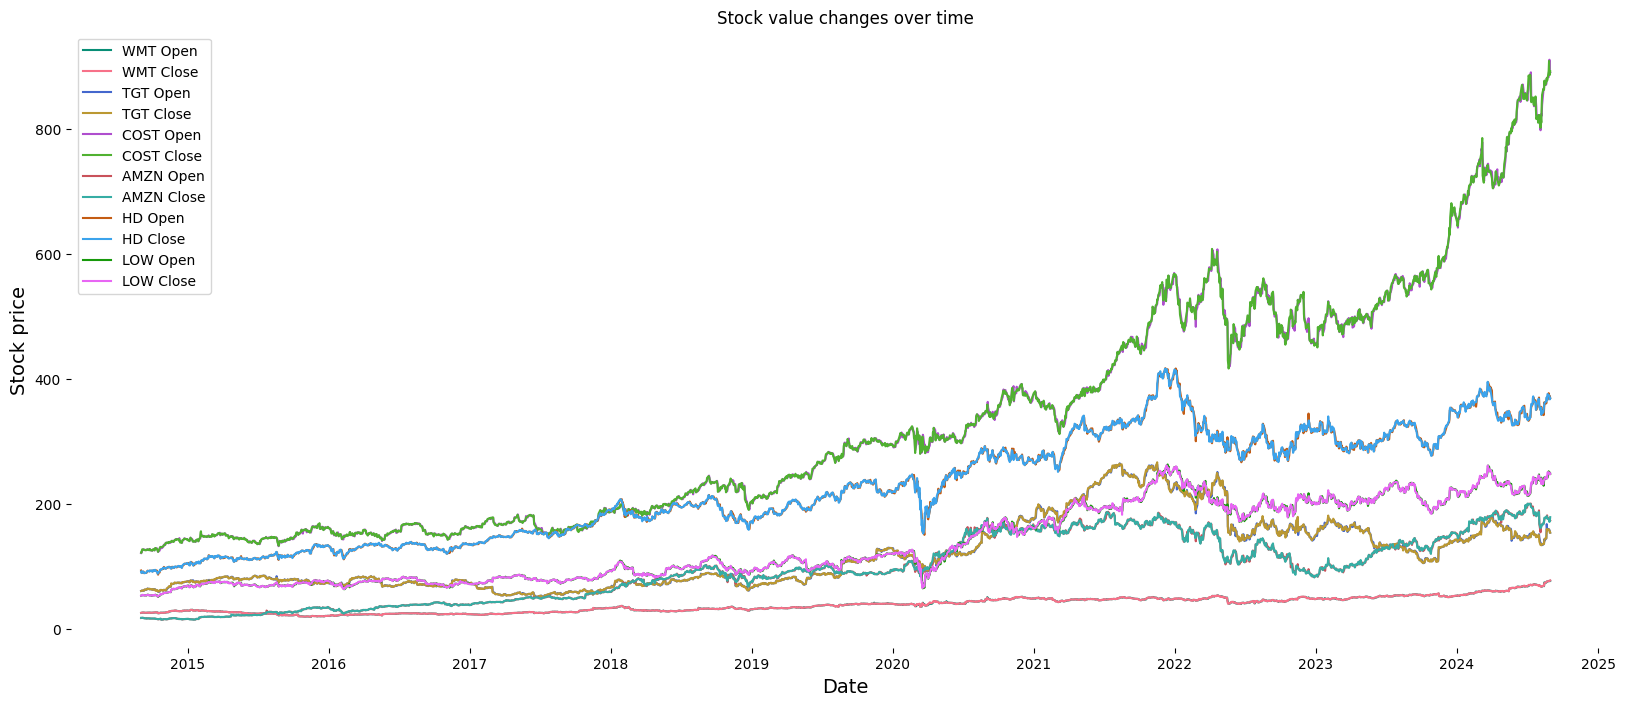

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def invert_color(color):
    if all(isinstance(c, float) for c in color):
        return tuple(1 - c for c in color)
    # Otherwise assume it's in integer format (0-255 range)
    return tuple(255 - c for c in color)

combined_data['Date'] = pd.to_datetime(combined_data['Date'])

fig = plt.figure(figsize=(20,8))

palette = sns.color_palette('husl', n_colors=len(combined_data['Ticker'].unique()))

for i, ticker in enumerate(combined_data['Ticker'].unique()):
    cd_ticker = combined_data[combined_data['Ticker'] == ticker]  # Filter data for each ticker
    ax = sns.lineplot(x='Date', y='Open', data=cd_ticker, color=invert_color(palette[i]), label=f'{ticker} Open')
    ax = sns.lineplot(x='Date', y='Close', data=cd_ticker, color=palette[i], label=f'{ticker} Close')

for s in ['left', 'right', 'top', 'bottom']:
  ax.spines[s].set_visible(False) #removes plot borders for a better look

plt.title("Stock value changes over time")
plt.xlabel("Date", size=14)
plt.ylabel("Stock price", size=14)

plt.legend()
plt.show()

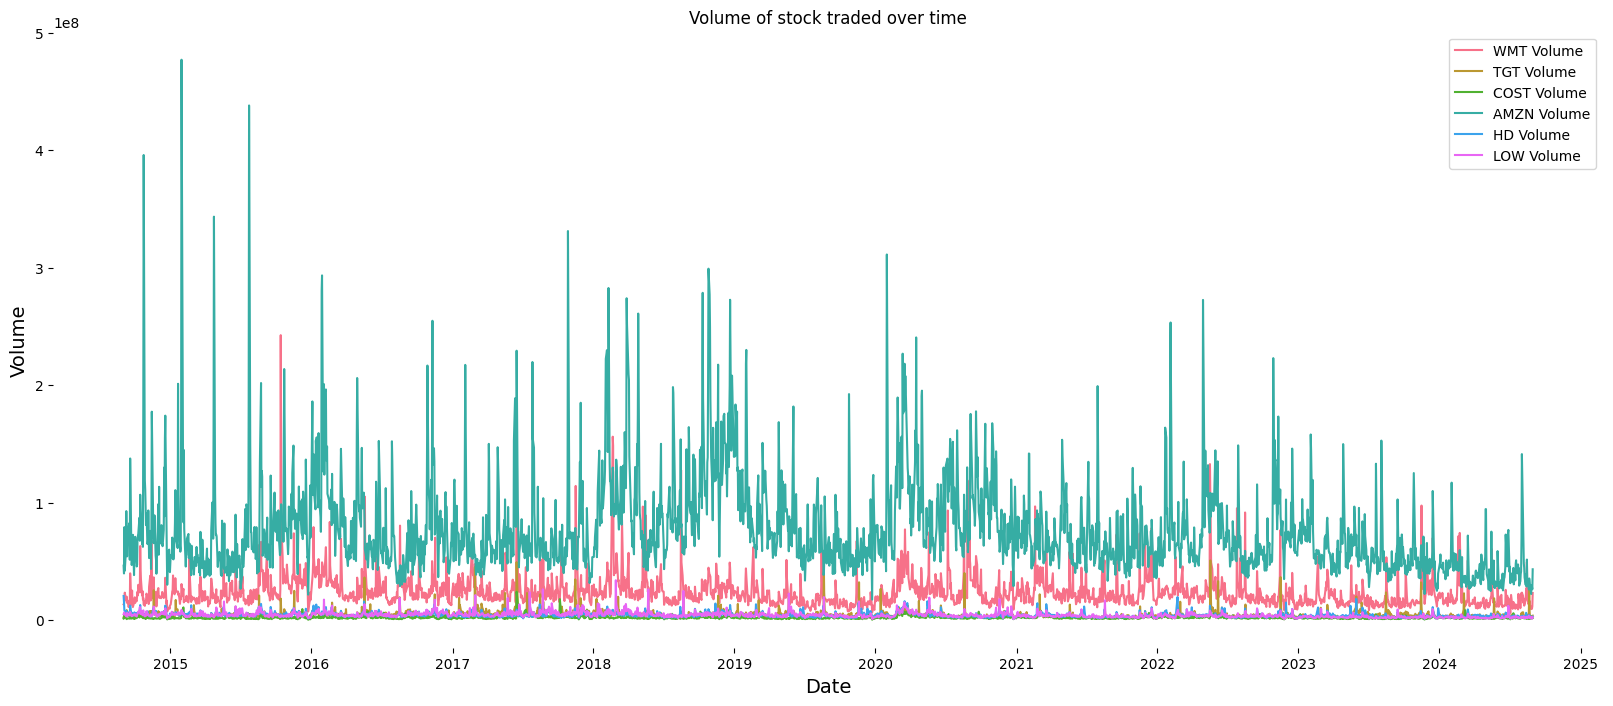

In [ ]:
fig = plt.figure(figsize=(20,8))

palette = sns.color_palette('husl', n_colors=len(combined_data['Ticker'].unique()))

for i, ticker in enumerate(combined_data['Ticker'].unique()):
    cd_ticker = combined_data[combined_data['Ticker'] == ticker]  # Filter data for each ticker
    ax = sns.lineplot(x='Date', y='Volume', data=cd_ticker, color=palette[i], label=f'{ticker} Volume')

for s in ['left', 'right', 'top', 'bottom']:
  ax.spines[s].set_visible(False) #removes plot borders for a better look

plt.title("Volume of stock traded over time")
plt.xlabel("Date", size=14)
plt.ylabel("Volume", size=14)

plt.legend()
plt.show()

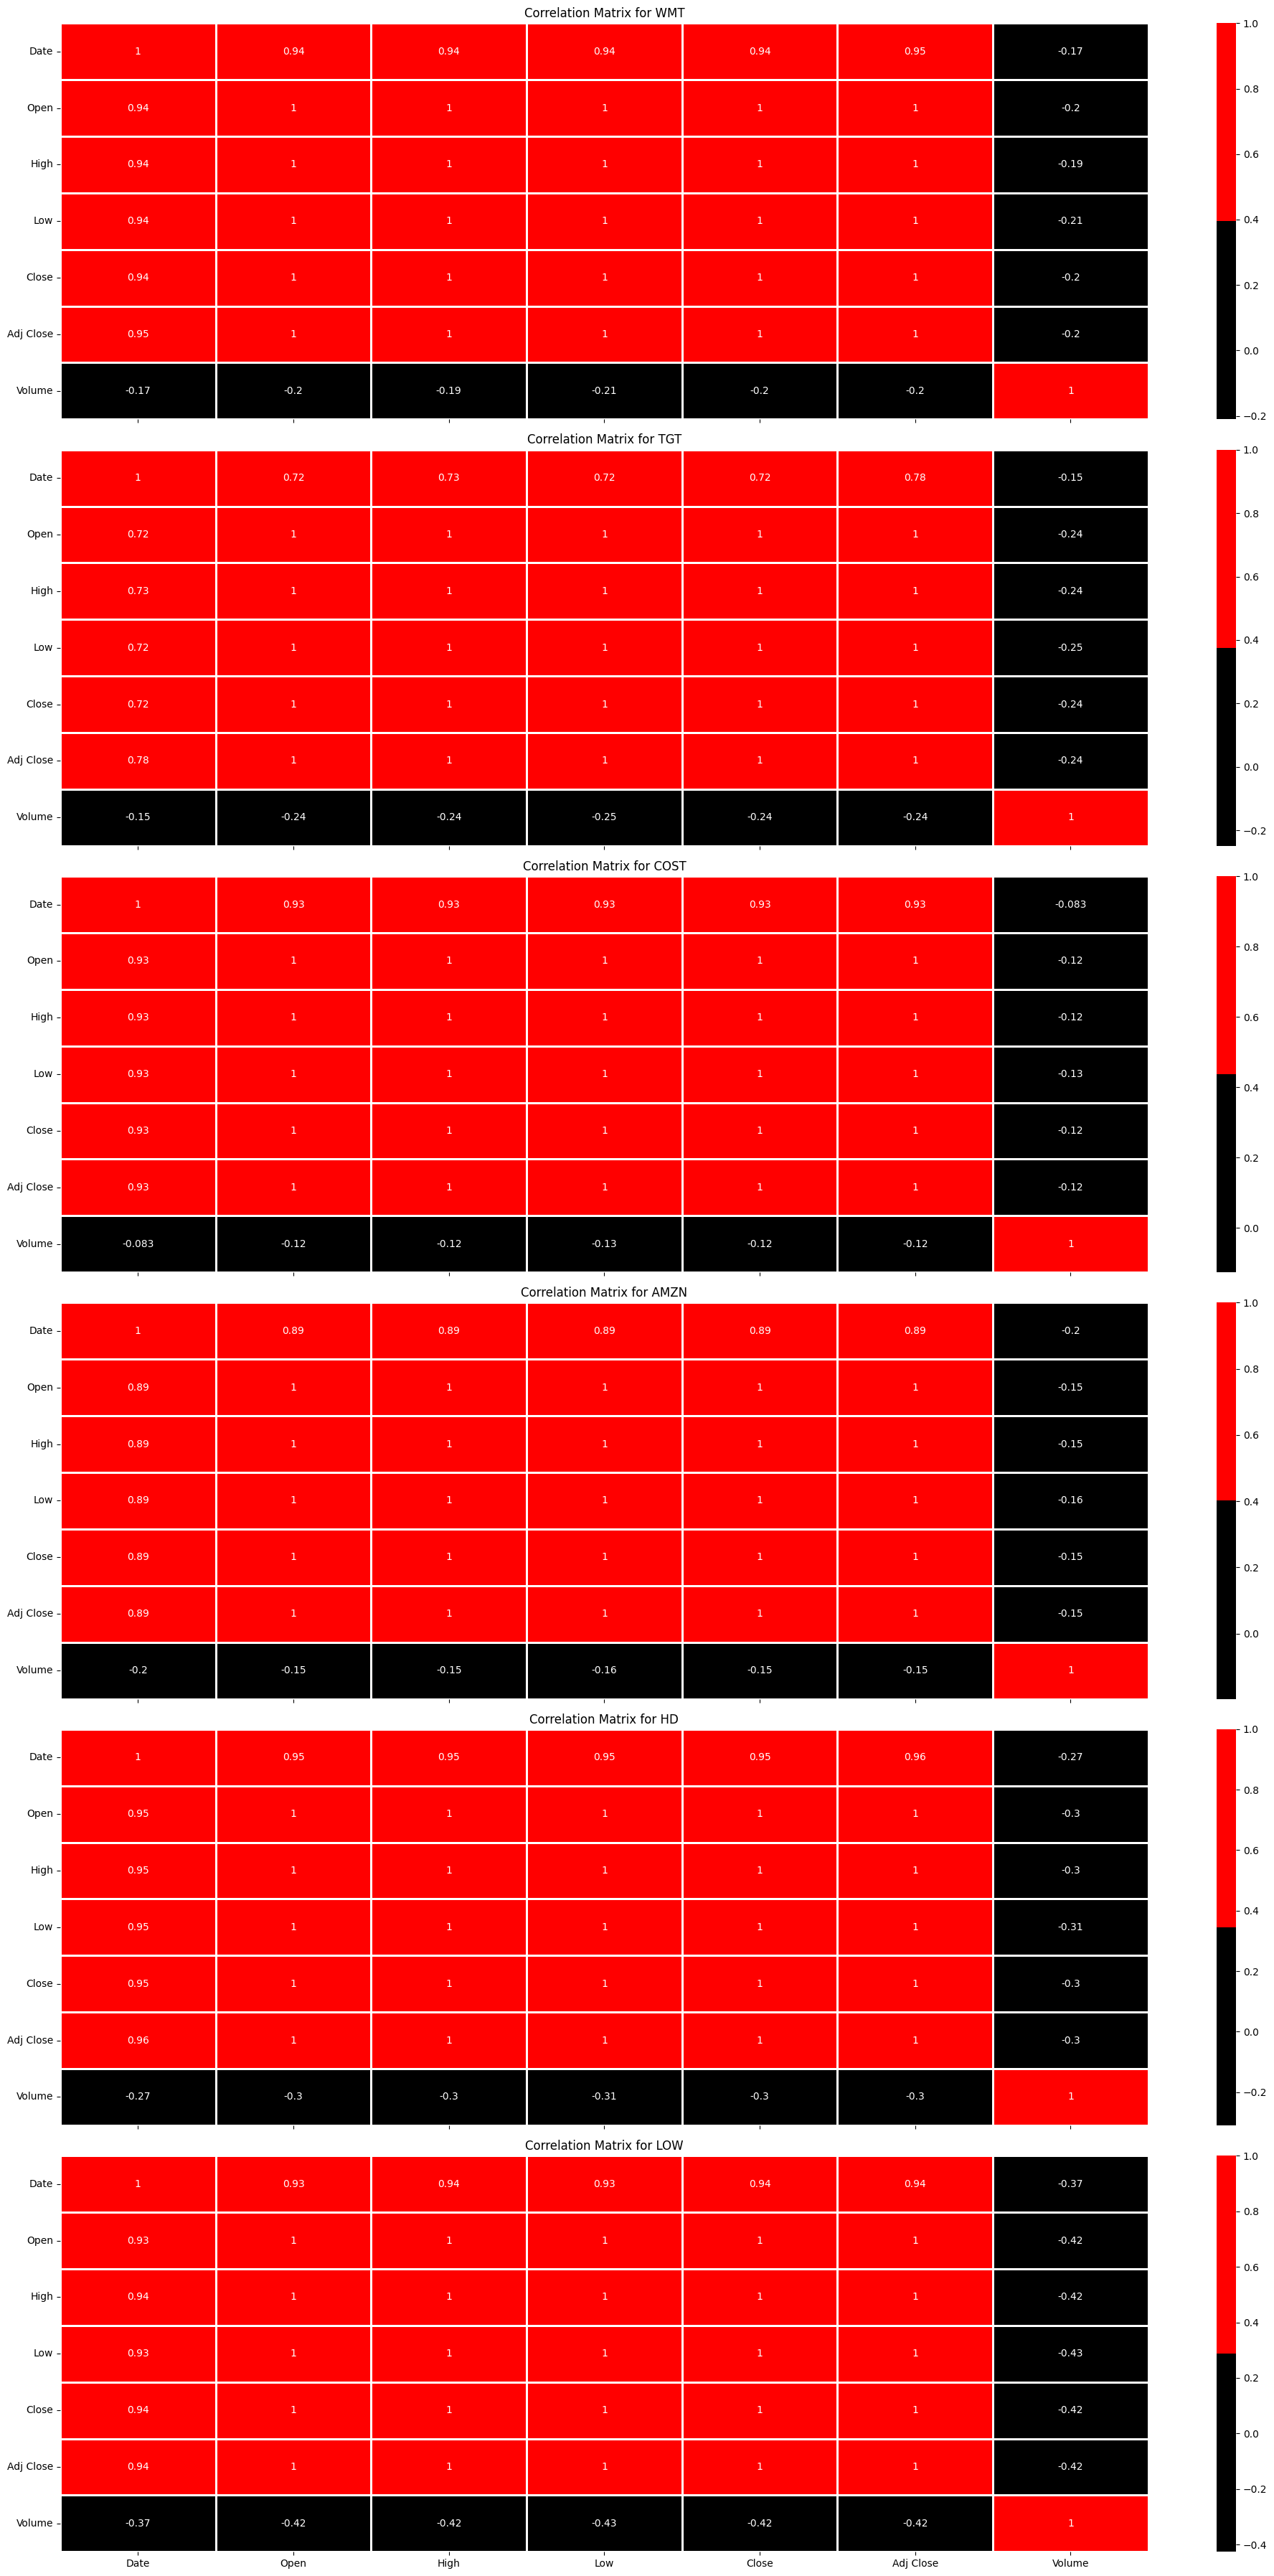

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique tickers and set up subplots
tickers = combined_data['Ticker'].unique()
num_tickers = len(tickers)

fig, axes = plt.subplots(num_tickers, 1, figsize=(20, 6 * num_tickers), sharex=True)

# Define colors for the heatmap
colors = ['Black', 'Red']

for i, ticker in enumerate(tickers):
    combined_data_ticker = combined_data[combined_data['Ticker'] == ticker]
    combined_data_ticker = combined_data_ticker.drop('Ticker', axis=1)

    # Plot the heatmap on the appropriate subplot
    sns.heatmap(combined_data_ticker.corr(), annot=True, cmap=colors, linecolor='white', linewidth=2, ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for {ticker}')

# Set labels and improve layout
plt.tight_layout()
plt.show()
